# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm
from wordcloud import WordCloud
import plotly.express as px
import joblib
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import calendar

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from math import sqrt
import joblib

# dataprocessing and cleaning


In [2]:
df1=pd.read_csv("1.csv")
df2=pd.read_csv("2.csv")
df3=pd.read_csv("3.csv")
df4=pd.read_csv("4.csv")
df5=pd.read_csv("5.csv")
print(df5)

          month        town  flat_type block        street_name storey_range  \
0       2017-01  ANG MO KIO     2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1       2017-01  ANG MO KIO     3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2       2017-01  ANG MO KIO     3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3       2017-01  ANG MO KIO     3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4       2017-01  ANG MO KIO     3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
...         ...         ...        ...   ...                ...          ...   
174141  2024-03      YISHUN     4 ROOM  501A       YISHUN ST 51     10 TO 12   
174142  2024-03      YISHUN     4 ROOM   841       YISHUN ST 81     01 TO 03   
174143  2024-03      YISHUN     5 ROOM  428A      YISHUN AVE 11     04 TO 06   
174144  2024-03      YISHUN     5 ROOM   637       YISHUN ST 61     10 TO 12   
174145  2024-03      YISHUN  EXECUTIVE   791       YISHUN AVE 2     10 TO 12   

        floor_area_sqm      flat_model 

In [3]:
# Print the basic information and first few rows of the dataframe
print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
None
     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04

In [4]:
# Print the basic information and first few rows of the dataframe
print(df2.info())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB
None
     month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04

In [5]:
# Print the basic information and first few rows of the dataframe
print(df3.info())
print(df3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB
None
     month        town flat_type block        street_name storey_range  \
0  2012-03  ANG MO KIO    2 ROOM   172   ANG MO KIO AVE 4     06 TO 10   
1  2012-03  ANG MO KIO    2 ROOM   510   ANG MO KIO AVE 8     01 TO 05   
2 

In [6]:
# Print the basic information and first few rows of the dataframe
print(df4.info())
print(df4.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB
None
     month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    

In [7]:
# Print the basic information and first few rows of the dataframe
print(df5.info())
print(df5.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174146 entries, 0 to 174145
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                174146 non-null  object 
 1   town                 174146 non-null  object 
 2   flat_type            174146 non-null  object 
 3   block                174146 non-null  object 
 4   street_name          174146 non-null  object 
 5   storey_range         174146 non-null  object 
 6   floor_area_sqm       174146 non-null  float64
 7   flat_model           174146 non-null  object 
 8   lease_commence_date  174146 non-null  int64  
 9   remaining_lease      174146 non-null  object 
 10  resale_price         174146 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 14.6+ MB
None
     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01

# Preprocessing of remaining lease by splitting numeric part of remaining lease


In [8]:
# Extract the numeric part of 'remaining_lease', split by space, and convert to integer
df5['remaining_lease'] = df5['remaining_lease'].str.split(' ').str[0].astype('int64')

# Display the updated 'remaining_lease' column
print(df5['remaining_lease'])

# Print the basic information and first few rows of the dataframe
print(df5.info())
print(df5.head())

0         61
1         60
2         62
3         62
4         62
          ..
174141    92
174142    62
174143    90
174144    62
174145    62
Name: remaining_lease, Length: 174146, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174146 entries, 0 to 174145
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                174146 non-null  object 
 1   town                 174146 non-null  object 
 2   flat_type            174146 non-null  object 
 3   block                174146 non-null  object 
 4   street_name          174146 non-null  object 
 5   storey_range         174146 non-null  object 
 6   floor_area_sqm       174146 non-null  float64
 7   flat_model           174146 non-null  object 
 8   lease_commence_date  174146 non-null  int64  
 9   remaining_lease      174146 non-null  int64  
 10  resale_price         174146 non-null  float64
dtypes: float64(2), int64(2), o

# Data merging

In [9]:
# Merging datasets df1, df2, df3, df4 and df5
combined_data = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Print the basic information and first few rows of the merged dataframe
print(combined_data.info())
print(combined_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920349 entries, 0 to 920348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                920349 non-null  object 
 1   town                 920349 non-null  object 
 2   flat_type            920349 non-null  object 
 3   block                920349 non-null  object 
 4   street_name          920349 non-null  object 
 5   storey_range         920349 non-null  object 
 6   floor_area_sqm       920349 non-null  float64
 7   flat_model           920349 non-null  object 
 8   lease_commence_date  920349 non-null  int64  
 9   resale_price         920349 non-null  float64
 10  remaining_lease      211299 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 77.2+ MB
None
     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  

# Feature Engineering

In [10]:
# Split 'month' into 'year' and 'month' columns
combined_data[['year', 'month']] = combined_data['month'].str.split('-', expand=True)

# Convert 'year' and 'month' columns to numeric types if needed
combined_data['year'] = pd.to_numeric(combined_data['year'])
combined_data['month'] = pd.to_numeric(combined_data['month'])

# Display the basic information and the updated DataFrame
print(combined_data.info())
print(combined_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920349 entries, 0 to 920348
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                920349 non-null  int64  
 1   town                 920349 non-null  object 
 2   flat_type            920349 non-null  object 
 3   block                920349 non-null  object 
 4   street_name          920349 non-null  object 
 5   storey_range         920349 non-null  object 
 6   floor_area_sqm       920349 non-null  float64
 7   flat_model           920349 non-null  object 
 8   lease_commence_date  920349 non-null  int64  
 9   resale_price         920349 non-null  float64
 10  remaining_lease      211299 non-null  float64
 11  year                 920349 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 84.3+ MB
None
   month        town flat_type block       street_name storey_range  \
0      1  ANG MO KIO    1 ROOM   309

## Calculating remaining lease using below formula for NAN value
## remaining lease = 99 - (Year - lease commence date)

In [11]:
# Calculate the remaining lease for rows with NaN values
combined_data['remaining_lease'].fillna(99 - (combined_data['year'] - combined_data['lease_commence_date']), inplace=True)

# Verify the results
print(combined_data[['lease_commence_date', 'year', 'remaining_lease']])

        lease_commence_date  year  remaining_lease
0                      1977  1990             86.0
1                      1977  1990             86.0
2                      1977  1990             86.0
3                      1977  1990             86.0
4                      1976  1990             85.0
...                     ...   ...              ...
920344                 2018  2024             92.0
920345                 1988  2024             62.0
920346                 2015  2024             90.0
920347                 1987  2024             62.0
920348                 1987  2024             62.0

[920349 rows x 3 columns]


C:\Users\vanda\AppData\Local\Temp\ipykernel_11896\1923006805.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['remaining_lease'].fillna(99 - (combined_data['year'] - combined_data['lease_commence_date']), inplace=True)


# Unique value

In [12]:
print(combined_data['town'].unique())
print(combined_data['flat_type'].unique())
print(combined_data['block'].unique())
print(combined_data['street_name'].unique())
print(combined_data['storey_range'].unique())
print(combined_data['flat_model'].unique())

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']
['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION' 'MULTI-GENERATION']
['309' '216' '211' ... '438C' '606C' '605D']
['ANG MO KIO AVE 1' 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4'
 'ANG MO KIO AVE 10' 'ANG MO KIO AVE 5' 'ANG MO KIO AVE 8'
 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 9' 'ANG MO KIO AVE 2'
 'BEDOK RESERVOIR RD' 'BEDOK NTH ST 3' 'BEDOK STH RD' 'NEW UPP CHANGI RD'
 'BEDOK NTH RD' 'BEDOK STH AVE 1' 'CHAI CHEE RD' 'CHAI CHEE DR'
 'BEDOK NTH AVE 4' 'BEDOK STH AVE 3' 'BEDOK STH AVE 2' 'BEDOK NTH ST 2'
 'BEDOK NTH ST 4' 'BEDOK NTH AVE 2' 'BEDOK NTH AVE 3' 'BEDOK NTH AVE 1'
 'BEDOK NTH ST 1' 'CHAI CHEE ST' 'SIN MING RD' 'SHUNF

# Standardising columns

In [13]:
# Changing the case to uppercase for consistency
combined_data['flat_model'] = combined_data['flat_model'].str.upper()

# Printing the unique values
print(combined_data['flat_model'].unique())

# Convert 'flat_type' values to lowercase
combined_data['flat_type'] = combined_data['flat_type'].str.lower()

# Standardize values to a common set of categories
type_mapping = {
    '1 room': '1 room',
    '3 room': '3 room',
    '4 room': '4 room',
    '5 room': '5 room',
    '2 room': '2 room',
    'executive': 'executive',
    'multi generation': 'multi generation',
    'multi-generation': 'multi generation'
}

combined_data['flat_type'] = combined_data['flat_type'].map(type_mapping)

# Changing the case to Uppercase
combined_data['flat_type'] = combined_data['flat_type'].str.upper()

# Display the unique values
print(combined_data['flat_type'].unique())

['IMPROVED' 'NEW GENERATION' 'MODEL A' 'STANDARD' 'SIMPLIFIED'
 'MODEL A-MAISONETTE' 'APARTMENT' 'MAISONETTE' 'TERRACE' '2-ROOM'
 'IMPROVED-MAISONETTE' 'MULTI GENERATION' 'PREMIUM APARTMENT'
 'ADJOINED FLAT' 'PREMIUM MAISONETTE' 'MODEL A2' 'DBSS' 'TYPE S1'
 'TYPE S2' 'PREMIUM APARTMENT LOFT' '3GEN']
['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION']


# Removing Outlier

In [14]:
# Checking for number of rows with remaining lease period more than 99
print((combined_data['remaining_lease']>99).sum())

# Create a boolean mask to identify rows containing any of the specified values
mask =combined_data['remaining_lease']>99

# Use the boolean mask to drop rows
df_combined = combined_data[~mask]

# Display the DataFrame after dropping rows
print(combined_data)

51
        month        town  flat_type block       street_name storey_range  \
0           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4           1  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...       ...         ...        ...   ...               ...          ...   
920344      3      YISHUN     4 ROOM  501A      YISHUN ST 51     10 TO 12   
920345      3      YISHUN     4 ROOM   841      YISHUN ST 81     01 TO 03   
920346      3      YISHUN     5 ROOM  428A     YISHUN AVE 11     04 TO 06   
920347      3      YISHUN     5 ROOM   637      YISHUN ST 61     10 TO 12   
920348      3      YISHUN  EXECUTIVE   791      YISHUN AVE 2     10 TO 12   

        floor_area_sqm      flat_model  lease_commence_date  resale_pric

In [15]:
# Drop rows where the 'storey_range' column contains specific values
values_to_drop = ['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '31 TO 35', '36 TO 40']

# Create a boolean mask to identify rows containing any of the specified values
mask = df_combined['storey_range'].isin(values_to_drop)

# Use the boolean mask to drop rows
df_combined = df_combined[~mask]

# Display the DataFrame after dropping rows
print(df_combined)

        month        town  flat_type block       street_name storey_range  \
0           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4           1  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...       ...         ...        ...   ...               ...          ...   
920344      3      YISHUN     4 ROOM  501A      YISHUN ST 51     10 TO 12   
920345      3      YISHUN     4 ROOM   841      YISHUN ST 81     01 TO 03   
920346      3      YISHUN     5 ROOM  428A     YISHUN AVE 11     04 TO 06   
920347      3      YISHUN     5 ROOM   637      YISHUN ST 61     10 TO 12   
920348      3      YISHUN  EXECUTIVE   791      YISHUN AVE 2     10 TO 12   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  

In [16]:
#Split the 'storey_range' into lower and upper bounds
combined_data[['lower_bound', 'upper_bound']] = combined_data['storey_range'].str.split(' TO ', expand=True)

#Convert the lower and upper bounds to numeric values
combined_data['lower_bound'] = pd.to_numeric(combined_data['lower_bound'])
combined_data['upper_bound'] = pd.to_numeric(combined_data['upper_bound'])

#Display the DataFrame with lower and upper bounds
print(combined_data[['storey_range', 'lower_bound', 'upper_bound']])

       storey_range  lower_bound  upper_bound
0          10 TO 12           10           12
1          04 TO 06            4            6
2          10 TO 12           10           12
3          07 TO 09            7            9
4          04 TO 06            4            6
...             ...          ...          ...
920344     10 TO 12           10           12
920345     01 TO 03            1            3
920346     04 TO 06            4            6
920347     10 TO 12           10           12
920348     10 TO 12           10           12

[920349 rows x 3 columns]


In [17]:
# Adding a new column 'price_per_sqm'
combined_data['price_per_sqm'] = combined_data['resale_price'] / combined_data['floor_area_sqm']

# Adding a new column 'years_holding'
combined_data['years_holding'] = combined_data['year'] - combined_data['lease_commence_date']

# Adding a new column 'current_remaining_lease'
combined_data['current_remaining_lease'] = combined_data['remaining_lease'] - (2024 - combined_data['year'])

# Display the DataFrame with the new column
print(combined_data[['resale_price', 'floor_area_sqm', 'price_per_sqm']])
print(combined_data[['year', 'lease_commence_date', 'remaining_lease', 'years_holding', 'current_remaining_lease']])

        resale_price  floor_area_sqm  price_per_sqm
0             9000.0            31.0     290.322581
1             6000.0            31.0     193.548387
2             8000.0            31.0     258.064516
3             6000.0            31.0     193.548387
4            47200.0            73.0     646.575342
...              ...             ...            ...
920344      623000.0            92.0    6771.739130
920345      575000.0           104.0    5528.846154
920346      663000.0           112.0    5919.642857
920347      680000.0           121.0    5619.834711
920348      851888.0           146.0    5834.849315

[920349 rows x 3 columns]
        year  lease_commence_date  remaining_lease  years_holding  \
0       1990                 1977             86.0             13   
1       1990                 1977             86.0             13   
2       1990                 1977             86.0             13   
3       1990                 1977             86.0             13   
4   

In [18]:
# Saving the clean dataset to a file
combined_data = combined_data .reset_index(drop=True)
combined_data .to_csv('Singapore_resale_flat_prices_updated.csv', index=False)
print(combined_data)

        month        town  flat_type block       street_name storey_range  \
0           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4           1  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...       ...         ...        ...   ...               ...          ...   
920344      3      YISHUN     4 ROOM  501A      YISHUN ST 51     10 TO 12   
920345      3      YISHUN     4 ROOM   841      YISHUN ST 81     01 TO 03   
920346      3      YISHUN     5 ROOM  428A     YISHUN AVE 11     04 TO 06   
920347      3      YISHUN     5 ROOM   637      YISHUN ST 61     10 TO 12   
920348      3      YISHUN  EXECUTIVE   791      YISHUN AVE 2     10 TO 12   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  

## Exploratory data analysis

Basic info about data

In [19]:
# Reading the dataset
dataset = pd.read_csv('Singapore_resale_flat_prices_updated.csv')
# Display basic information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920349 entries, 0 to 920348
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    920349 non-null  int64  
 1   town                     920349 non-null  object 
 2   flat_type                920349 non-null  object 
 3   block                    920349 non-null  object 
 4   street_name              920349 non-null  object 
 5   storey_range             920349 non-null  object 
 6   floor_area_sqm           920349 non-null  float64
 7   flat_model               920349 non-null  object 
 8   lease_commence_date      920349 non-null  int64  
 9   resale_price             920349 non-null  float64
 10  remaining_lease          920349 non-null  float64
 11  year                     920349 non-null  int64  
 12  lower_bound              920349 non-null  int64  
 13  upper_bound              920349 non-null  int64  
 14  pric

In [20]:
# Display summary statistics of numerical columns
print(dataset.describe())

               month  floor_area_sqm  lease_commence_date  resale_price  \
count  920349.000000   920349.000000        920349.000000  9.203490e+05   
mean        6.568563       95.695225          1988.203681  3.187100e+05   
std         3.419143       25.837770            10.587640  1.686600e+05   
min         1.000000       28.000000          1966.000000  5.000000e+03   
25%         4.000000       73.000000          1981.000000  1.920000e+05   
50%         7.000000       93.000000          1986.000000  2.950000e+05   
75%        10.000000      113.000000          1996.000000  4.150000e+05   
max        12.000000      307.000000          2022.000000  1.568888e+06   

       remaining_lease           year    lower_bound    upper_bound  \
count    920349.000000  920349.000000  920349.000000  920349.000000   
mean         81.065758    2006.036557       6.675699       8.690559   
std          10.724102       9.227536       4.814115       4.814130   
min          41.000000    1990.000000   

In [21]:
# Check for missing values
print(dataset.isnull().sum())

month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease            0
year                       0
lower_bound                0
upper_bound                0
price_per_sqm              0
years_holding              0
current_remaining_lease    0
dtype: int64


## Univariate Analysis

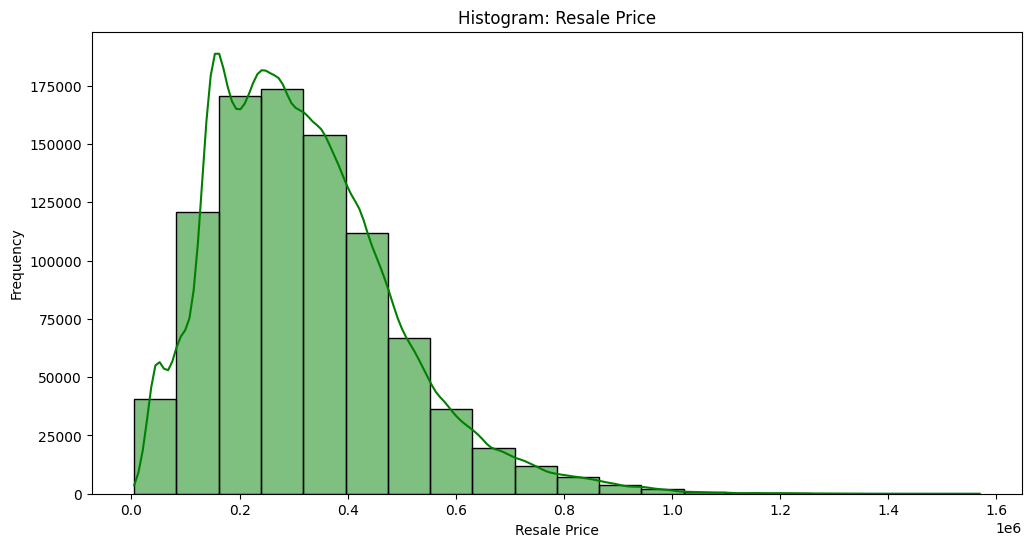

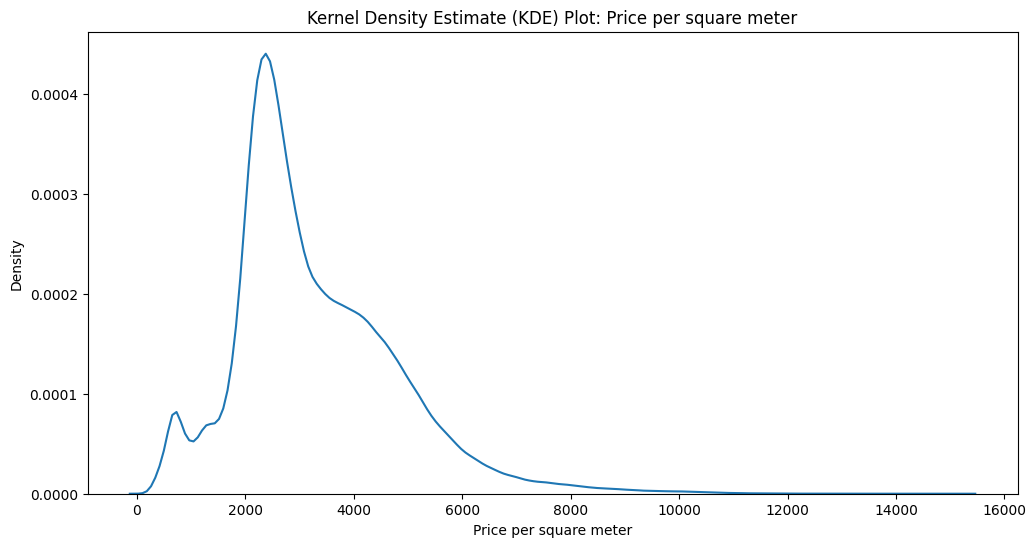

C:\Users\vanda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


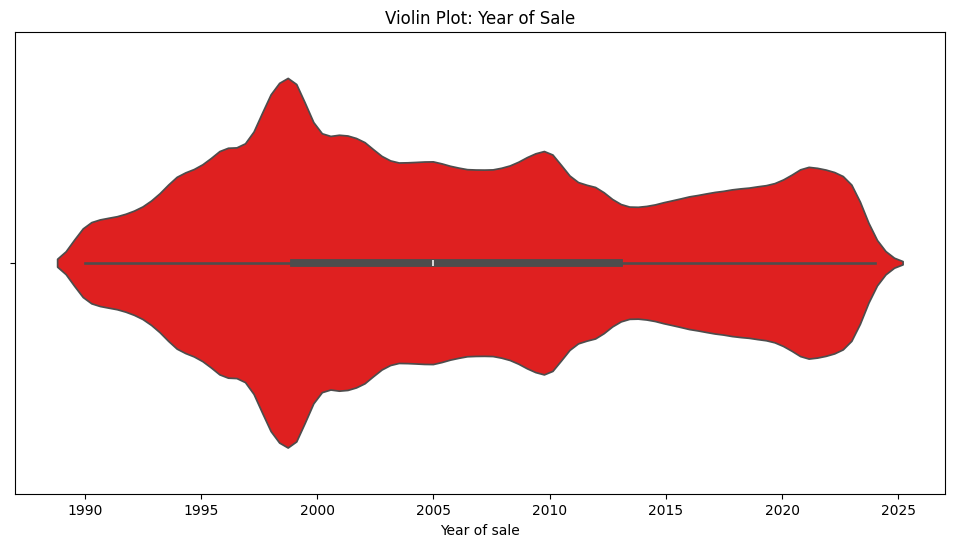

C:\Users\vanda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


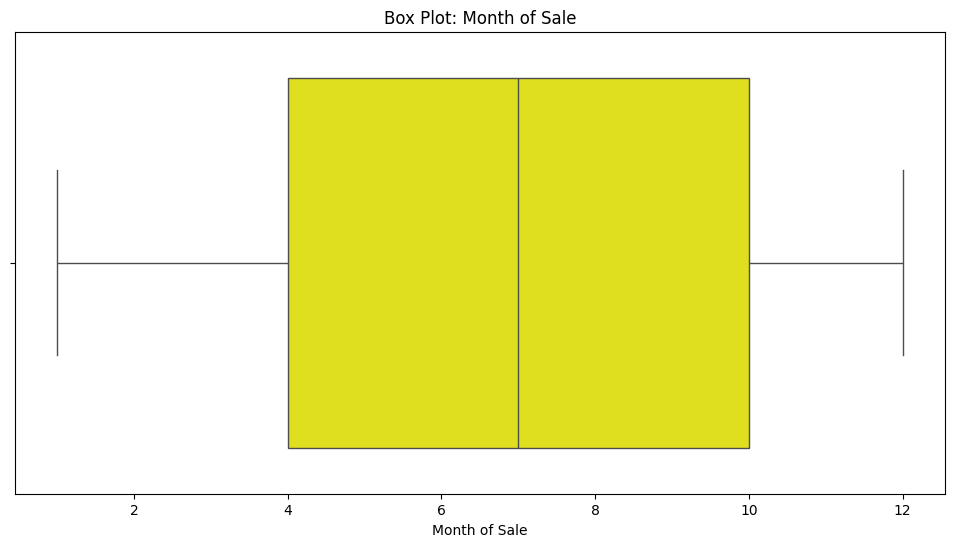

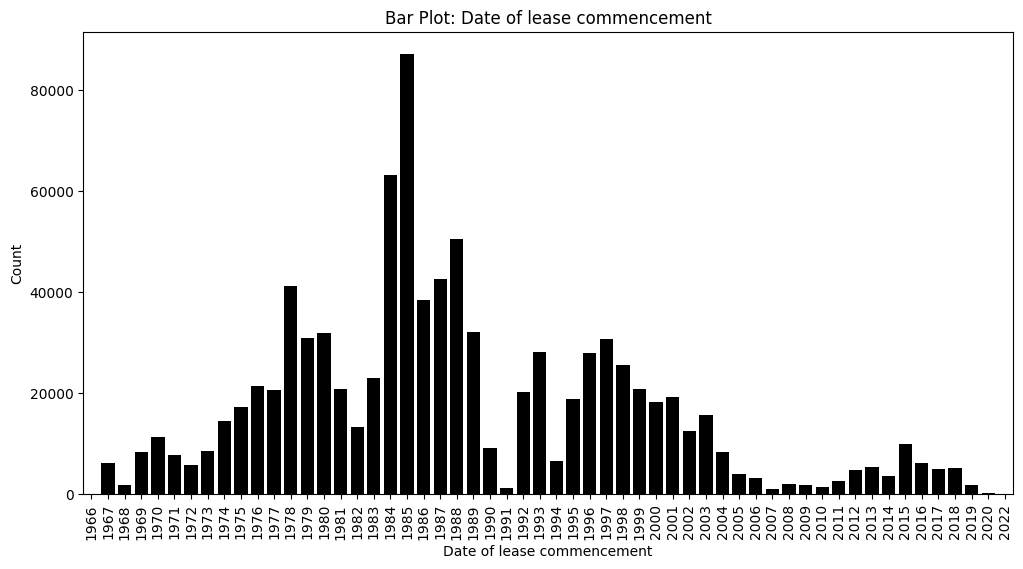

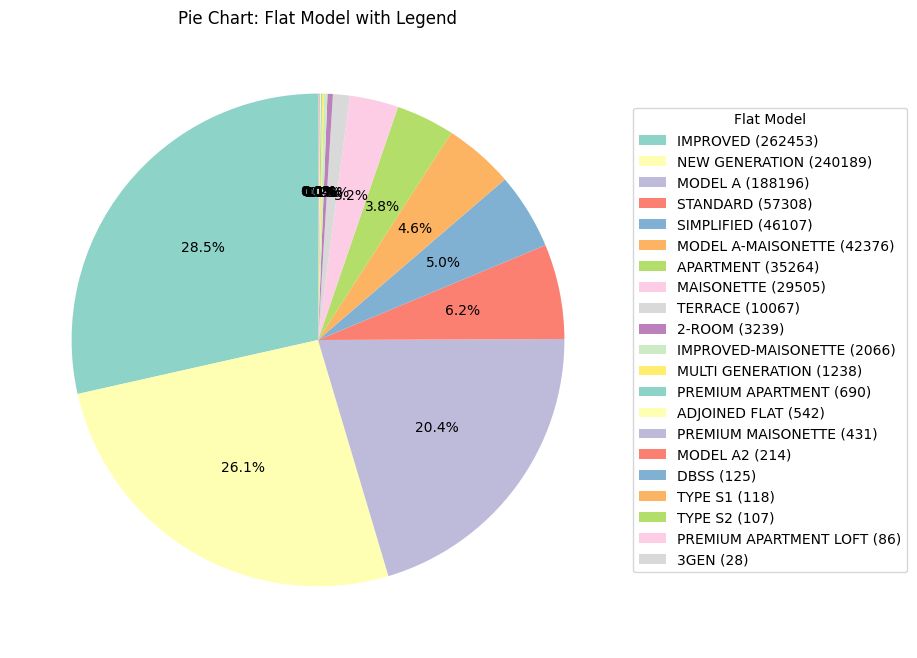

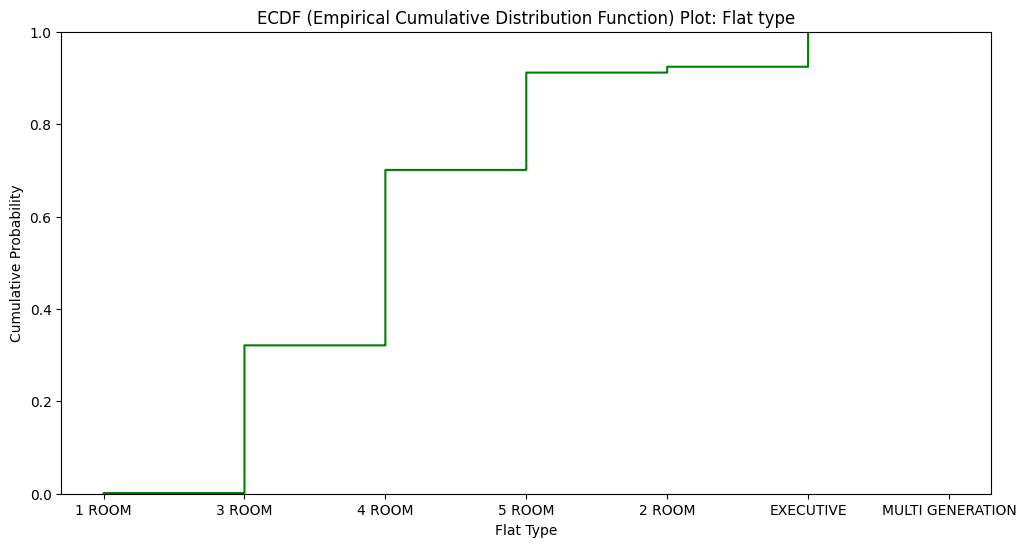

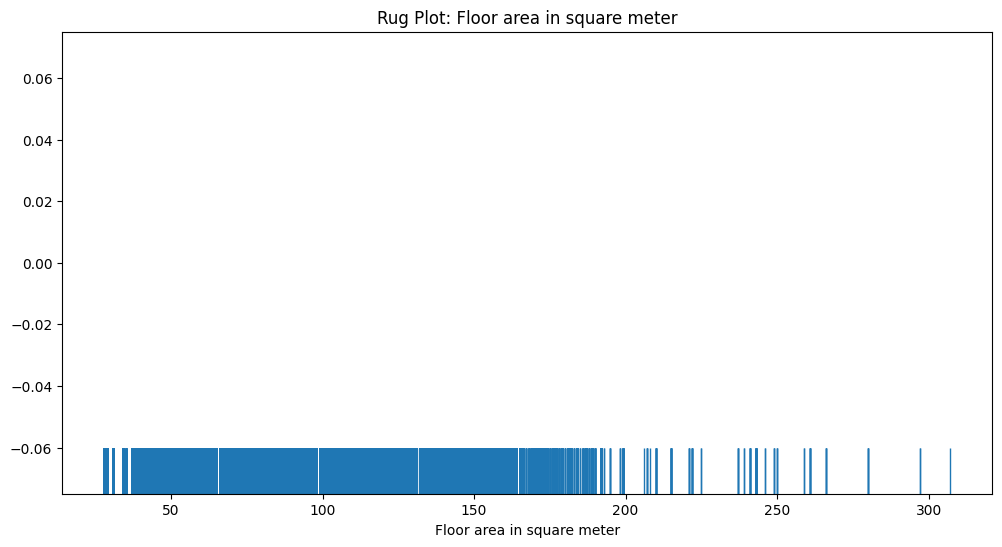

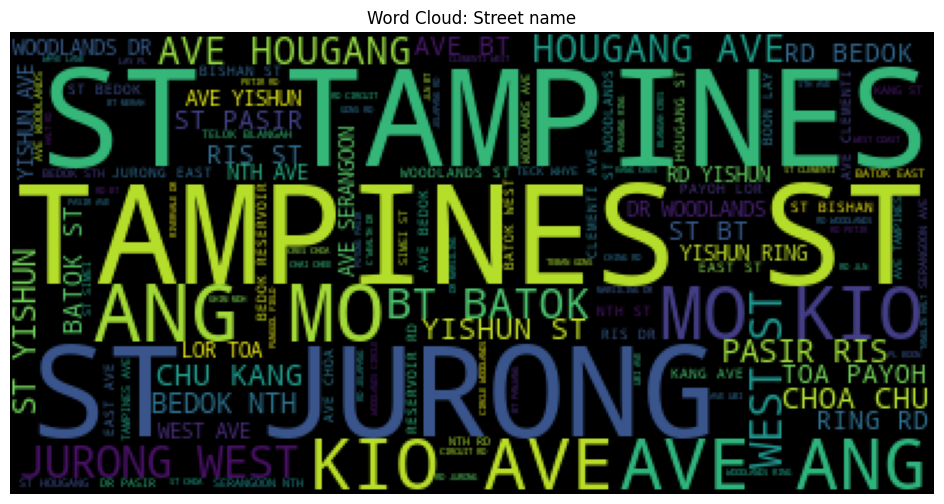

In [22]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(dataset['resale_price'], color="green", bins=20, kde=True)
plt.title('Histogram: Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

# KDE Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(dataset['price_per_sqm'])
plt.title('Kernel Density Estimate (KDE) Plot: Price per square meter')
plt.xlabel('Price per square meter')
plt.ylabel('Density')
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x=dataset['year'],color="red")
plt.title('Violin Plot: Year of Sale')
plt.xlabel('Year of sale')
plt.show()

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['month'],color="yellow")
plt.title('Box Plot: Month of Sale')
plt.xlabel('Month of Sale')
plt.show()

# Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='lease_commence_date', data=dataset,color="black")
plt.title('Bar Plot: Date of lease commencement')
plt.xlabel('Date of lease commencement')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Pie Chart with Legend for Improved Label Display
plt.figure(figsize=(8, 8))
label_counts = dataset['flat_model'].value_counts()
unique_labels = dataset['flat_model'].unique()

plt.pie(label_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(unique_labels)))
legend_labels = [f"{label} ({count})" for label, count in zip(unique_labels, label_counts)]
plt.legend(legend_labels, title='Flat Model', bbox_to_anchor=(1, 0.5), loc="center left")

plt.title('Pie Chart: Flat Model with Legend')
plt.show()

# ECDF Plot
plt.figure(figsize=(12, 6))
sns.ecdfplot(dataset['flat_type'],color="green")
plt.title('ECDF (Empirical Cumulative Distribution Function) Plot: Flat type')
plt.xlabel('Flat Type')
plt.ylabel('Cumulative Probability')
plt.show()

# Rug Plot
plt.figure(figsize=(12, 6))
sns.rugplot(dataset['floor_area_sqm'], height=0.1)
plt.title('Rug Plot: Floor area in square meter')
plt.xlabel('Floor area in square meter')
plt.show()

# Word Cloud (for text-based columns)
wordcloud = WordCloud().generate(' '.join(dataset['street_name']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud: Street name')
plt.show()


## Bivariate Analysis


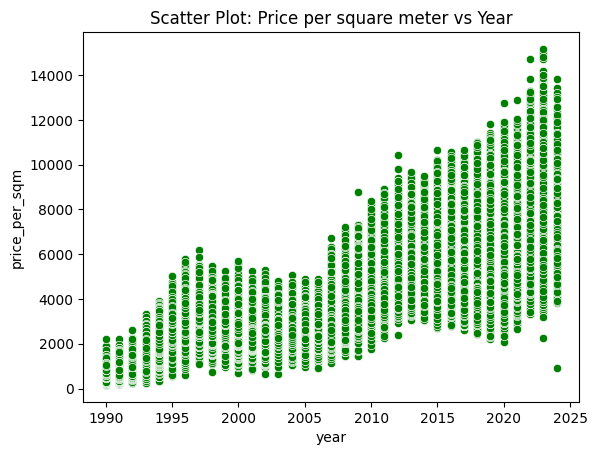

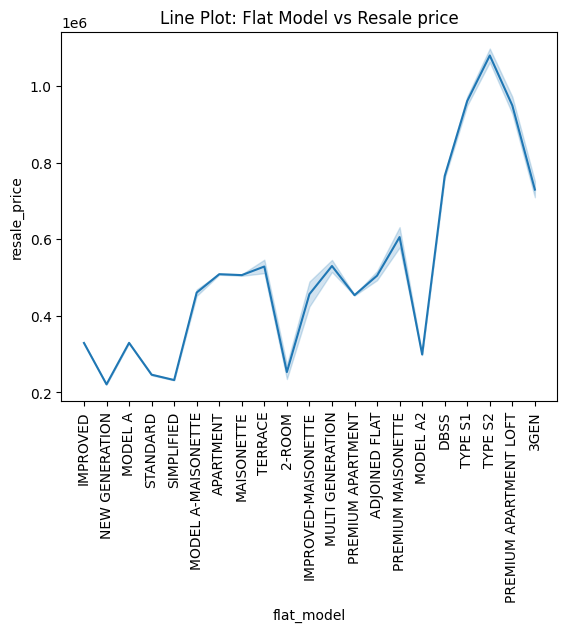

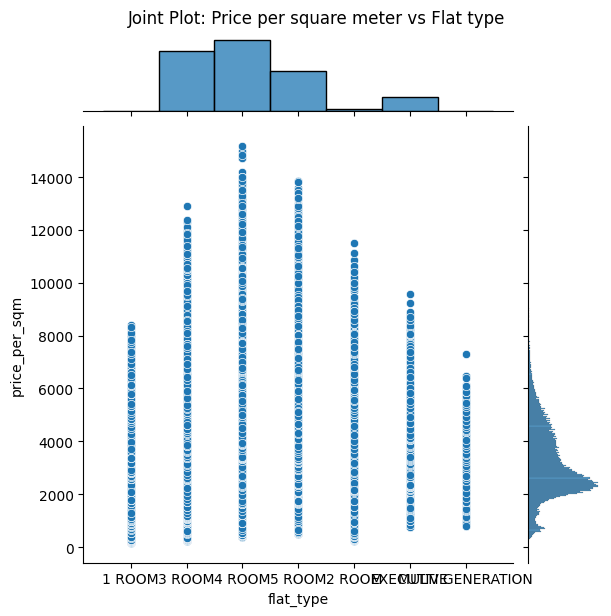

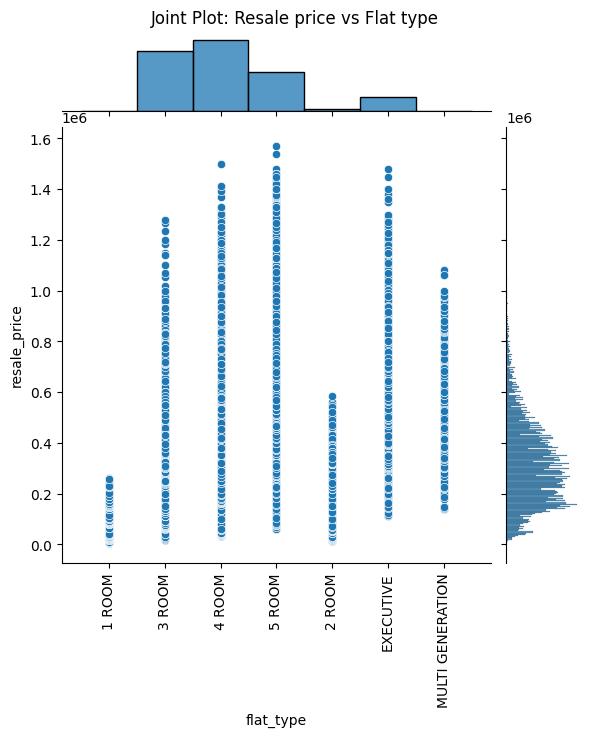

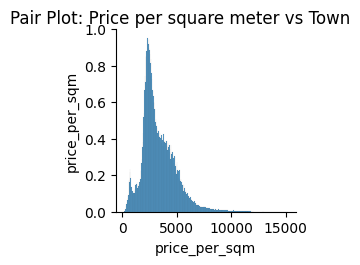

In [23]:
# Scatter Plot
sns.scatterplot(x='year', y='price_per_sqm', data=dataset,color="green")
plt.title('Scatter Plot: Price per square meter vs Year')
plt.show()

# Line plot
sns.lineplot(x='flat_model', y='resale_price', data=dataset)
plt.title('Line Plot: Flat Model vs Resale price')
plt.xticks(rotation=90)
plt.show()

# Joint plot
sns.jointplot(x='flat_type', y='price_per_sqm', data=dataset)
plt.suptitle('Joint Plot: Price per square meter vs Flat type', y=1.02)
plt.show()

# Joint plot
sns.jointplot(x='flat_type', y='resale_price', data=dataset)
plt.suptitle('Joint Plot: Resale price vs Flat type', y=1.02)
plt.xticks(rotation=90)
plt.show()

# Pair plot
sns.pairplot(dataset[['price_per_sqm', 'town']])
plt.suptitle('Pair Plot: Price per square meter vs Town', y=1.02)
plt.show()



## Mulivariate Analysis

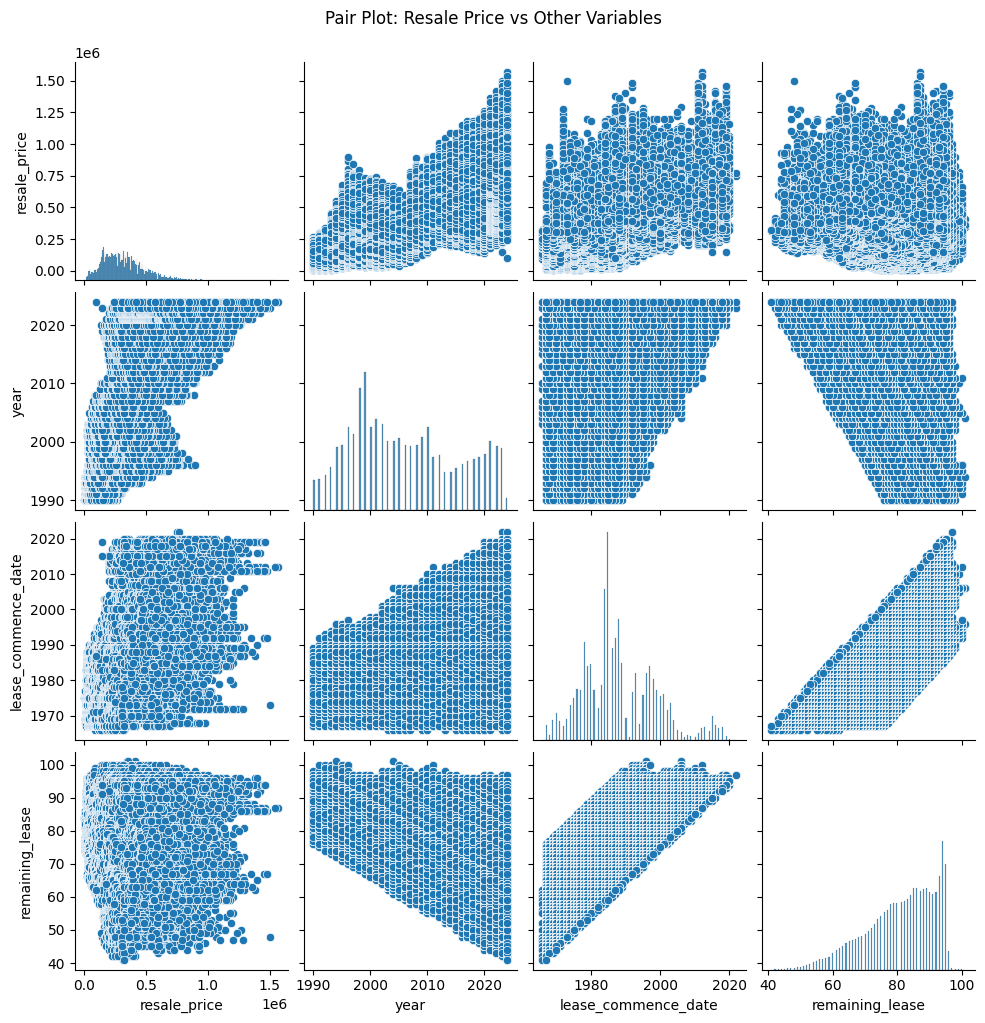

In [24]:
# Pair plot
sns.pairplot(dataset[['resale_price', 'year', 'lease_commence_date', 'remaining_lease']])
plt.suptitle('Pair Plot: Resale Price vs Other Variables', y=1.02)
plt.show()


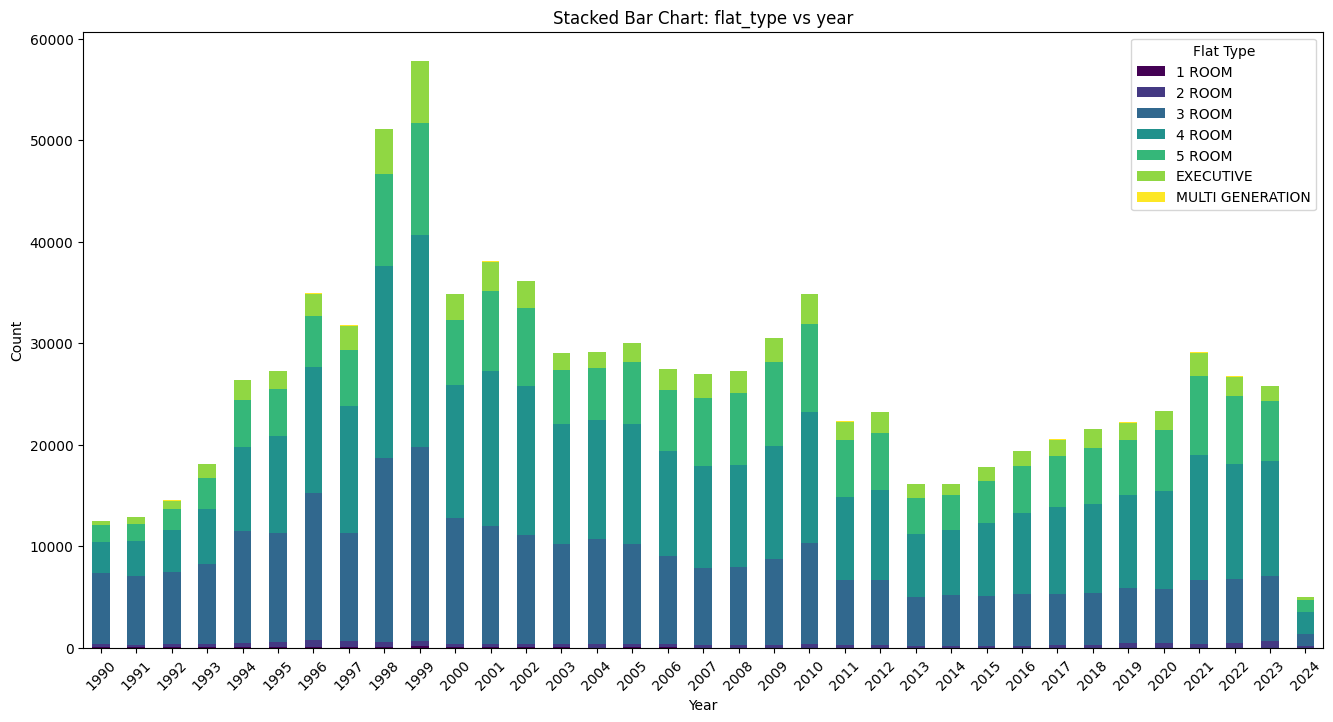

In [25]:
# Stacked Bar Chart for flat_type vs year
plt.figure(figsize=(16, 8))

df_year = dataset.groupby(['year', 'flat_type']).size().unstack()
df_year.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

plt.title('Stacked Bar Chart: flat_type vs year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Flat Type')
plt.xticks(rotation=45)
plt.show()

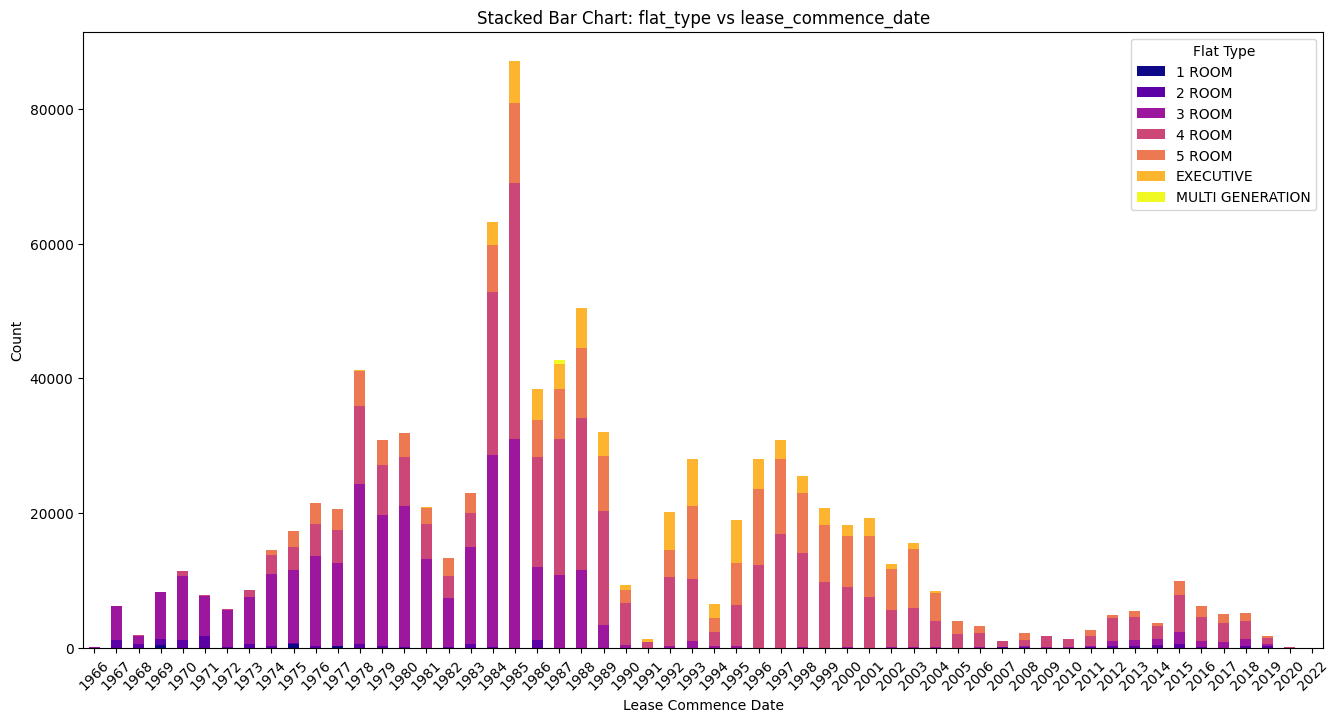

In [26]:
# Stacked Bar Chart for flat_type vs lease_commence_date
plt.figure(figsize=(16, 8))

df_lease_commence_date = dataset.groupby(['lease_commence_date', 'flat_type']).size().unstack()
df_lease_commence_date.plot(kind='bar', stacked=True, colormap='plasma', ax=plt.gca())

plt.title('Stacked Bar Chart: flat_type vs lease_commence_date')
plt.xlabel('Lease Commence Date')
plt.ylabel('Count')
plt.legend(title='Flat Type')
plt.xticks(rotation=45)
plt.show()



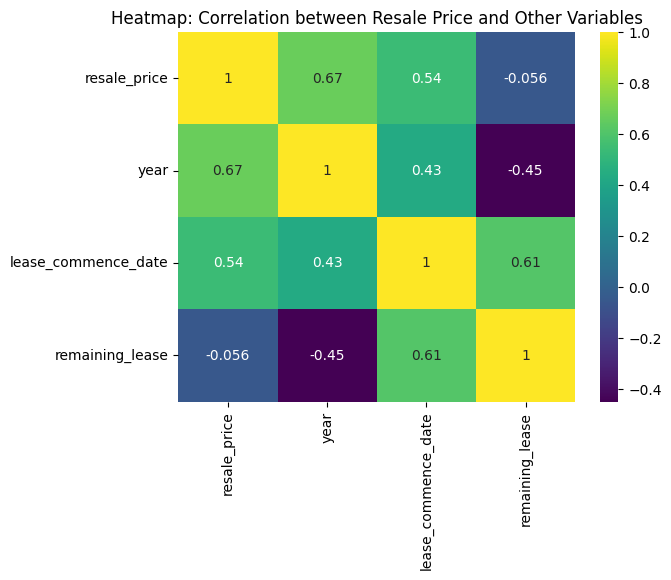

In [27]:
# Heatmap
sns.heatmap(dataset[['resale_price', 'year', 'lease_commence_date', 'remaining_lease']].corr(), annot=True, cmap='viridis')
plt.title('Heatmap: Correlation between Resale Price and Other Variables')
plt.show()

# Model Building

## Prerequisite

In [28]:
# Drop irrelevant columns
selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 
                    'current_remaining_lease', 'years_holding', 'resale_price']
dftrain = dataset[selected_columns]

# Separate features (X) and target variable (y)
X = dftrain.drop('resale_price', axis=1)
y = dftrain['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Linear Regression

In [30]:
# Create the regression model
model = LinearRegression()

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

In [31]:
# Fit the model
pipeline.fit(X_train, y_train)

# save the model
model_filename = 'resale_price_prediction_linear.joblib'
joblib.dump(pipeline, model_filename)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

In [32]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

In [33]:
# Print or use the metrics as needed
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Explained Variance Score: {explained_variance}")

Mean Absolute Error (MAE): 51797.67529377311
Mean Squared Error (MSE): 4594829217.593706
Root Mean Squared Error (RMSE): 67785.16959921032
R-squared (R2) Score: 0.8385755188345144
Explained Variance Score: 0.8385772229317785


### Decision Tree

In [34]:
# Drop irrelevant columns
selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 
                    'current_remaining_lease', 'years_holding', 'resale_price']
dftrain = dataset[selected_columns]

# Separate features (X) and target variable (y)
X = dftrain.drop('resale_price', axis=1)
y = dftrain['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [36]:
# Create the regression model
model = DecisionTreeRegressor(random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

In [37]:
# Fit the model
pipeline.fit(X_train, y_train)

# save the model
model_filename = 'resale_price_prediction_decision_tree.joblib'
joblib.dump(pipeline, model_filename)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

In [38]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

In [39]:
# Print or use the metrics as needed
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Explained Variance Score: {explained_variance}")

Mean Absolute Error (MAE): 20584.85376837246
Mean Squared Error (MSE): 961317801.9629103
Root Mean Squared Error (RMSE): 31005.125414403832
R-squared (R2) Score: 0.966227204523115
Explained Variance Score: 0.9662280814204947


### XGBoost

In [40]:
# Create the XGBoost regression model
model3 = XGBRegressor(random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model3)])

# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['year', 'floor_area_sqm', 'lease_commence_date', 'remaining_lease',
       'current_remaining_lease', 'years_holding'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['town', 'flat_type', 'flat_model', 'storey_range'], dtype='object'))])),
                ('model',
                 XGBRegressor(base_score=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [41]:
# Save the model
model_filename = 'resale_price_prediction_xgboost.joblib'
joblib.dump(pipeline, model_filename)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

In [42]:
# Print or use the metrics as needed
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Explained Variance Score: {explained_variance}")

Mean Absolute Error (MAE): 20548.361424701656
Mean Squared Error (MSE): 834519905.4758991
Root Mean Squared Error (RMSE): 28888.058181122164
R-squared (R2) Score: 0.9706818390011316
Explained Variance Score: 0.9706821430674916
